In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Classifier Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Decision Tree Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


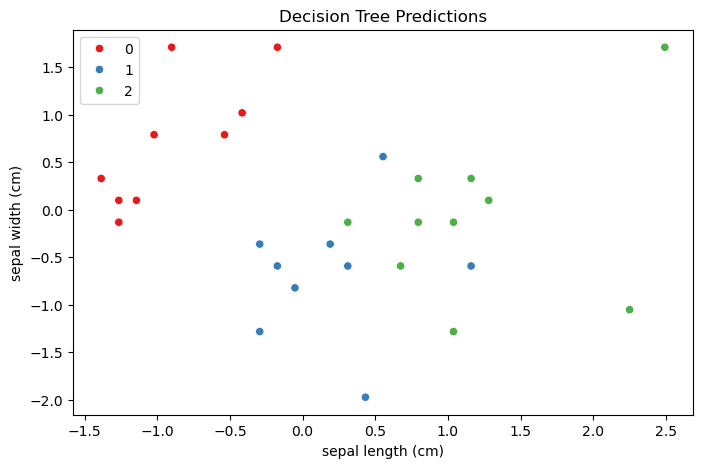

In [12]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_tree = dtc.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

# Visualize decision tree predictions
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred_tree, palette='Set1')
plt.title("Decision Tree Predictions")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

Bagging Classifier Accuracy: 1.0
Bagging Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Bagging Classifier Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


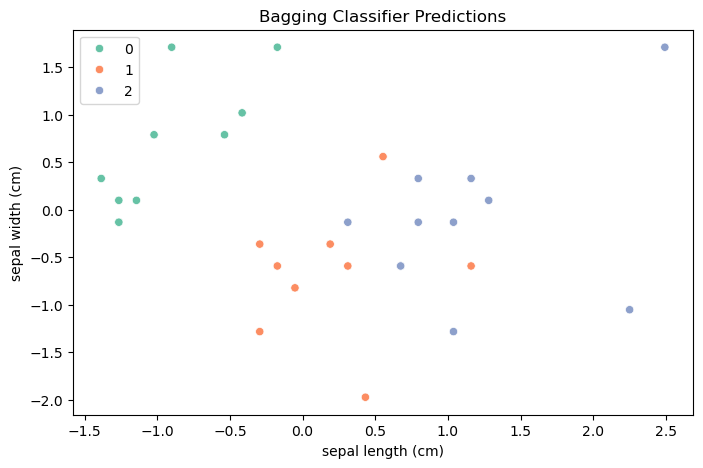

In [13]:
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)

# Evaluate Bagging Classifier
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Bagging Classifier Classification Report:\n", classification_report(y_test, y_pred_bagging))
print("Bagging Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))

# Visualize Bagging predictions
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred_bagging, palette='Set2')
plt.title("Bagging Classifier Predictions")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()